# Gradient descent

In this notebook, I'm going to explain gradient descent. Before the lesson, please install the matplotlib，ipywidgets and Pytorch in your environment.Some visualization code cannot work in Jupyter Lab, so please make sure you are openning this note in Jupyter Notebook.

# Introduction
---
The gradient descent method is an algorithm dedicated to finding the extreme point of a function. In machine learning, we generally obtain model parameters through this method to obtain the extreme value of the objective function or loss function.

---
The basic idea of the gradient descent method can be analogized to a down-hill process. Suppose a scene: a person is trapped on a mountain and needs to get down from it (i.e. find the lowest point of the mountain, which is the valley). But at this time, the dense fog on the mountain is very heavy, resulting in very low visibility. Therefore, the path down the mountain cannot be determined, and he must use the information around him to find the path down the mountain. At this time, he can use the gradient descent algorithm to help himself down the mountain. Specifically, based on his current position, look for the steepest place in this position, and then walk toward the place where the height of the mountain drops. Similarly, if our goal is to go up the mountain, that is, climb to the top of the mountain. ,it should be moving upwards in the steepest direction. Then every time he walked a certain distance, he repeated the same method, and finally reached the valley successfully.

---
![title](img/1.png) ![title](img/2.png) ![title](img/3.png) ![title](img/4.png) 

---
The basic process of gradient descent is very similar to the downhill scene.

First, we have a differentiable function. This function represents a mountain. Our goal is to find the minimum value of this function, which is the bottom of the mountain. According to the previous scenario assumptions, the fastest way to descend the mountain is to find the steepest direction of the current position, and then walk down this direction, corresponding to the function, which is to find the gradient of a given point, and then move in the opposite direction of the gradient. It can make the function value drop the fastest! Because the direction of the gradient is the fastest changing direction of the function (will be explained in detail later)
Therefore, we repeatedly use this method to obtain the gradient repeatedly, and finally we can reach the local minimum, which is similar to the process of descending mountain. And obtaining the gradient determines the steepest direction, which is the method of measuring the direction in the scene.

---

# Gradient
---
The gradient is actually a generalization of multivariate differentiation.<br>
The following example:
$J(\Theta) = 0.55 - (5\theta_1 + 2\theta_2 - 12\theta_3)$<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$ \nabla J(\Theta) =  {\langle}\frac{\partial J}{\partial \theta_1}, \frac{\partial J}{\partial \theta_2}, \frac{\partial J}{\partial \theta_3}{\rangle}$<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$ = {\langle}-5, -2, 12{\rangle}$<br>

We can see that the gradient is to differentiate each variable separately and then separate it with a comma. The gradient is included with <>, indicating that the gradient is actually a vector.

- In a univariate function, the gradient is actually the differentiation of the function, representing the slope of the tangent of the function at a given point<br>
- In a multivariate function, the gradient is a vector, and the vector has a direction. The direction of the gradient indicates the fastest rising direction of the function at a given point

This also explains why we need to do everything possible to obtain the gradient. If we need to reach the bottom of the mountain, we need to observe the steepest place at this time at each step, and the gradient tells us this direction.The direction of the gradient is the fastest direction in which the function rises at a given point, and the opposite direction of the gradient is the fastest direction in which the function falls at a given point, which is exactly what we need. So as long as we keep walking along the direction of the gradient, we can reach the local lowest point.

# Problem setup

---
Have some cost function：$J(\theta_0, \theta_1)$<br>
Want $minJ(\theta_0, \theta_1)$
### Outline:
Start with some $\theta_0, \theta_1$<br>
Keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$<br>
until we hopefully end up at a minimum


---

# Gradient descent algorithm
repeat until convergence{
$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)  （for j = 0 and j = 1）$$ 
}<br>
$\alpha$ ： learning rate, it controls how big a step we take downhill with gradient descent
![title](img/9.png)

# Gradient descent of a univariate function
We assume that there is a single variable function：<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$J(\theta) = \theta^2$<br>
Function differentiation:<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$f^{\prime}(\theta) = 2\theta$<br>



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 

def func(x):
    return np.square(x)

def dfunc(x):
    return 2 * x

Initialization, starting point is:<br>
 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$\theta^0 = -5$<br>
Learning rate:<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$\alpha = 0.3$<br>

In [3]:
def GD(x_start, df, epochs, lr):

    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        v = - dx * lr
        x += v
        xs[i+1] = x
    return xs

In [4]:
def demo0_GD():

    line_x = np.linspace(-5, 5, 100)
    line_y = func(line_x)

    x_start = -5
    epochs = 5

    lr = 0.3
    x = GD(x_start, dfunc, epochs, lr=lr)

    color = 'r'
    plt.plot(line_x, line_y, c='b')
    plt.plot(x, func(x), c=color, label='lr={}'.format(lr))
    plt.scatter(x, func(x), c=color, )
    plt.legend()
    plt.show()

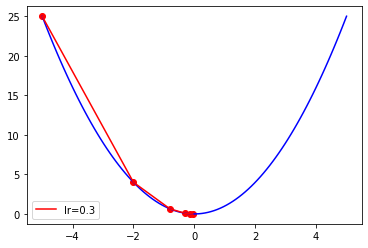

In [5]:
demo0_GD()

# Learning rate
α is called the learning rate or step length in the gradient descent algorithm, which means that we can control the distance of each step through α. α cannot be too large or too small. If it is too small, it may lead to a delay in reaching the lowest point. If it is too large, it will miss the lowest point.
![title](img/5.png)

In [6]:
def demo1_GD_lr():

    line_x = np.linspace(-5, 5, 100)
    line_y = func(line_x)
    plt.figure('Gradient Desent: Learning Rate')

    x_start = -5
    epochs = 5

    lr = [0.1, 0.3, 0.9]

    color = ['r', 'g', 'y']
    size = np.ones(epochs+1) * 10
    size[-1] = 70
    for i in range(len(lr)):
        x = GD(x_start, dfunc, epochs, lr=lr[i])
        plt.subplot(1, 3, i+1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}'.format(lr[i]))
        plt.scatter(x, func(x), c=color[i])
        plt.legend()
    plt.show()

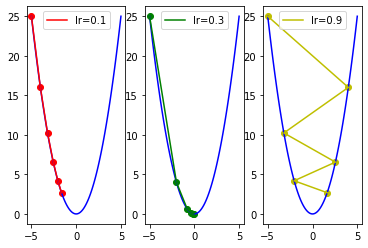

In [7]:
demo1_GD_lr()

# Gradient descent for multivariate functions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from mpl_toolkits import mplot3d 
#Function differentiation
def gradJ1(theta):
    return 4*theta
def gradJ2(theta):
    return 2*theta
 
#cost function
def f(x, y):
    return  2*x**2 +y**2

def ff(x,y):
    return 2*np.power(x,2)+np.power(y,2)

def train(lr,epoch,theta1,theta2,up,dirc):
    t1 = [theta1]
    t2 = [theta2]
    for i in range(epoch):
        gradient = gradJ1(theta1)
        theta1 = theta1 - lr*gradient
        t1.append(theta1)
        gradient = gradJ2(theta2)
        theta2 = theta2 - lr*gradient
        t2.append(theta2)
        
    plt.figure(figsize=(10,10))     
    x = np.linspace(-3,3,30)
    y = np.linspace(-3,3,30)
    X, Y = np.meshgrid(x, y)
    Z = f(X,Y)    
    ax = plt.axes(projection='3d')
    fig =plt.figure()
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.scatter3D(t1, t2, ff(t1,t2), c='r',marker = 'o')
    ax.view_init(up, dirc)

#Can be adjusted at any time to view the effect (minimum, maximum, step size)
@interact(lr=(0, 0.5, 0.0002),epoch=(1,100,1),init_theta1=(-3,3,0.1),init_theta2=(-3,3,0.1),up=(-180,180,1),dirc=(-180,180,1),continuous_update=False)
#lr is the learning rate (step size); epoch is the number of iterations; init_theta is the setting of the initial parameters; 
#up adjusts the upper and lower viewing angles of the picture; dirc adjusts the left and right viewing angles
def visualize_gradient_descent(lr=0.05,epoch=10,init_theta1=-2,init_theta2=-3,up=45,dirc=100):
    train(lr,epoch,init_theta1,init_theta2,up,dirc)

interactive(children=(FloatSlider(value=0.05, description='lr', max=0.5, step=0.0002), IntSlider(value=10, des…

# Gradient descent in linear regression
---
Below we will use python to implement a simple gradient descent algorithm. The scenario is a simple linear regression example: suppose now we have a series of points, as shown in the figure below：

![title](img/11.png)
We will use gradient descent to fit this straight line.<br>
First, we need to define a cost function, here we use the mean square error cost function
![title](img/10.png)
In this formula

- m is the number of points in the data set
- ½ is a constant, so that when calculating the gradient, the quadratic multiplication will offset the ½ here.Then there will be no extra constant coefficients, which is convenient for subsequent calculations and will not affect the results.
- y is the true y coordinate value of each point in the data set
- h is our prediction function. According to each input x, the predicted y value is calculated according to Θ：

![title](img/12.png)

We can see that there are two variables in the cost function, so it is a multi-variable gradient descent problem. Solving the gradient of the cost function is to differentiate the two variables separately.

![title](img/13.png)

---

# Coding Time
First, we need to define the data set and learning rate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Size of the points dataset.
m = 20

# Points x-coordinate and dummy value (x0, x1).
X0 = np.ones((m, 1))
X1 = np.arange(1, m+1).reshape(m, 1)
X = np.hstack((X0, X1))

# Points y-coordinate
y = np.array([
    3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
    11, 13, 13, 16, 17, 18, 17, 19, 21
]).reshape(m, 1)
'''
plt.plot(X1,y)
plt.show()
plt.scatter(X1,y)
plt.show()
'''
# The Learning Rate alpha.
alpha = 0.01

Next, we define the cost function and the gradient of the cost function in the form of a matrix vector

In [3]:
def error_function(theta, X, y):
    '''Error function J definition.'''
    diff = np.dot(X, theta) - y
    return (1./2*m) * np.dot(np.transpose(diff), diff)

def gradient_function(theta, X, y):
    '''Gradient of the function J definition.'''
    diff = np.dot(X, theta) - y
    return (1./m) * np.dot(np.transpose(X), diff)

Finally is the core part of the algorithm, gradient descent iterative calculation

In [10]:
def gradient_descent(X, y, alpha):
    '''Perform gradient descent.'''
    theta = np.array([1, 1]).reshape(2, 1)
    gradient = gradient_function(theta, X, y)
    while not np.all(np.absolute(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = gradient_function(theta, X, y)
    return theta

Visualize the results：

optimal: [[0.51583286]
 [0.96992163]]
error function: 405.98496249324046


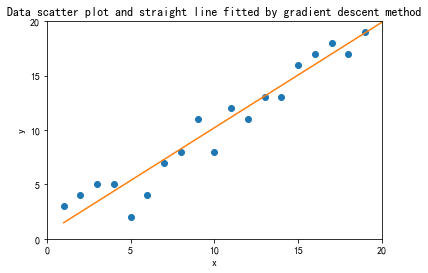

In [8]:
optimal = gradient_descent(X, y, alpha)
print('optimal:', optimal)
print('error function:', error_function(optimal, X, y)[0,0])
plt.title('Data scatter plot and straight line fitted by gradient descent method') 
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,20])
plt.ylim([0,20])
plt.xticks([0,5,10,15,20])
plt.yticks([0,5,10,15,20])
plt.plot(X,optimal[0]+optimal[1]*X)
plt.scatter(X1,y)
plt.show()

# The three most common variants of gradient descent
#  1.Batch Gradient Descent （BGD）
---
Until here we have been using BDG, which is also the most basic gradient descent algorithm.<br>
BGD uses the data of the entire training set to calculate the gradient of the cost function to the parameters:
$$\theta := \theta - \alpha \nabla_\theta J(\theta)$$ 
<font color = red>Disadvantages:

- It is very slow to calculate
- It is very difficult to encounter a large number of data sets
- It is impossible to invest in new data to update the model in real time.
</font>

---

# 2.Stochastic Gradient Descent (SGD)
---
The stochastic gradient descent method is actually similar to the batch gradient descent method. The difference is that it does not use all the sample data when calculating the gradient, but only selects one sample to find the gradient：
$$\theta := \theta -  - \alpha \nabla_\theta J(\theta;x^i;y^i) $$
<font color = red>Disadvantages:

- For accuracy, the SGD method is used to determine the direction of the gradient with only one sample, which leads to the possibility that the solution is not optimal.
- For the convergence rate, because the SGD method iterates one sample at a time, the iteration direction changes greatly, and it cannot quickly converge to the local optimal solution.
</font>

---

# 3.Mini-Batch Gradient Descent （MBGD）
---
MBGD uses a small batch of samples each time, that is, n samples for calculation, so that it can reduce the variance during parameter update and converge more stably：
$$\theta := \theta - \alpha \nabla_\theta J(\theta;x^{(i:i+n)};y^{(i:i+n)}) $$

<font color = red>Disadvantages:

- If the learning rate is too small, the convergence speed will be very slow. If it is too large, the loss function will oscillate or even deviate at the minimum value.
- For non-convex functions, avoid trapping at local minimums or saddle points, because the error around the saddle point is the same, and the gradients of all dimensions are close to 0, and SGD is easily trapped here.
</font>
---

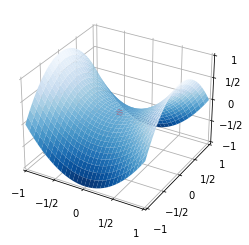

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_args = {'rstride': 1, 'cstride': 1, 'cmap':"Blues_r",
'linewidth': 0.4, 'antialiased': True,
'vmin': -1, 'vmax': 1}

x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2

ax.plot_surface(x, y, z, **plot_args)
ax.plot([0], [0], [0], 'ro')
ax.view_init(azim=-60, elev=30)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.xticks([-1, -0.5, 0, 0.5, 1],
[r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
plt.yticks([-1, -0.5, 0, 0.5, 1],
[r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticklabels([r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.savefig("Saddle_point.svg", bbox_inches="tight", transparent=True)
plt.show()

# 4.Momentum
When the SDG learning rate is large, it is easy to oscillate during the search process, as shown in the figure below：
![title](img/6.png)
Momentum can accelerate SGD and suppress oscillation by adding γv_t−1:
$$V_t = \gamma V_{T-1}+ \alpha \nabla_\theta J(\theta)$$
$$\theta := \theta -  V_t $$
The addition of this item can make the speed faster in the dimension where the gradient direction is unchanged, and slower in the dimension where the gradient direction is changed, so that the convergence can be accelerated and the oscillate can be reduced.
![title](img/7.png)

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return np.square(x)


def dfunc(x):
    return 2 * x

def GD_momentum(x_start, df, epochs, lr, mu):

    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    v = 0
    for i in range(epochs):
        dx = df(x)
        v = - dx * lr + mu * v
        x += v
        xs[i+1] = x
    return xs

<Figure size 432x288 with 0 Axes>

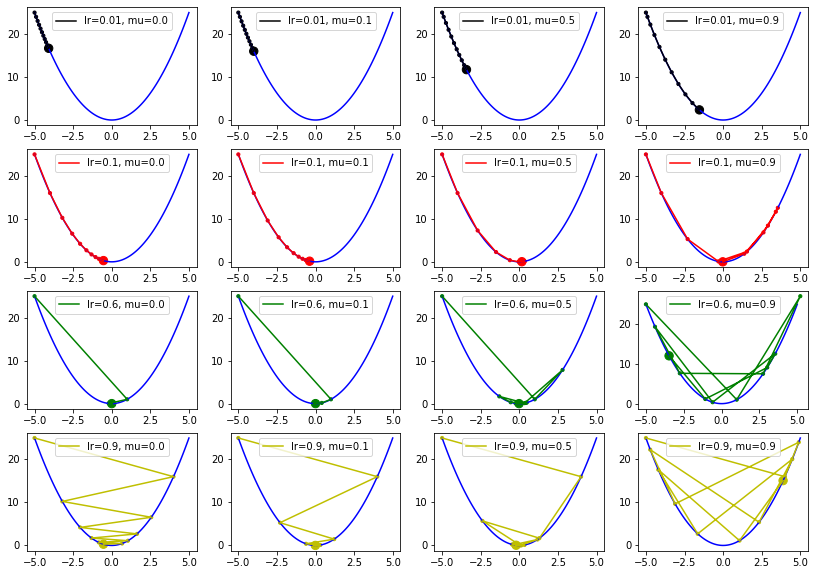

In [12]:
def demo2_GD_mu():
    line_x = np.linspace(-5, 5, 100)
    line_y = func(line_x)
    plt.figure('Gradient Desent: Learning Rate, Momentum')

    x_start = -5
    epochs = 10

    lr = [0.01, 0.1, 0.6, 0.9]
    mu = [0.0, 0.1, 0.5, 0.9]

    color = ['k', 'r', 'g', 'y']

    plt.figure(figsize=(14,10))
    row = len(lr)
    col = len(mu)
    size = np.ones(epochs+1) * 10
    size[-1] = 70
    for i in range(row):
        for j in range(col):
            x = GD_momentum(x_start, dfunc, epochs, lr=lr[i], mu=mu[j])
            plt.subplot(row, col, i * col + j + 1)
            plt.plot(line_x, line_y, c='b')
            plt.plot(x, func(x), c=color[i], label='lr={}, mu={}'.format(lr[i], mu[j]))
            plt.scatter(x, func(x), c=color[i], s=size)
            plt.legend(loc=0)
    plt.show()

demo2_GD_mu()

# 6.adaptive gradient methods：
## 6.1 AdaGrad 
## 6.2 RMSprop
## 6.3 Adam
## .......

## Backpropagation
---

In the linear regression model,$y = f(\theta;x)$ x is the input, y is the output, $\theta$ is the parameter, and the gradient descent algorithm is used to find the optimal parameter $\theta$. Here, the initial input x and the final output y are directly related. If linear regression is regarded as a neural network, then this network has only input and output layers, and no hidden layers. In a deep neural network, there may be multiple hidden layers, so how are its initial input and final output related? How to apply gradient descent to a neural network?

![title](img/8.jpg)
As shown in the figure above, the network has two hidden layers. The input of each hidden layer $layer_i$ is actually the output of the previous layer $layer_{i-1}$, and its output is the input of the next layer $layer_{i+1}$.The idea of backpropagation is to pass it to the neural network for each training instance and calculate its output. Then measure the output error of the network (that is, the difference between the expected output and the actual output), and calculate how much error each neuron in the previous hidden layer contributed to the output result. Repeat this step until the algorithm reaches the initial input layer.
This back propagation process effectively measures the error gradient of all connection weights in the network, and finally optimizes the parameters of the layer by applying a gradient descent algorithm in each hidden layer.

---

## Backpropagation in Pytorch
When using a machine learning library, we can directly call the encapsulated method without implementing the mathematical process of backpropagation by ourselves. 

In [ ]:
optimizer = torch.optim.SGD(net_SGD.parameters(), lr=LR)# Choose a Gradient Method
optimizer.zero_grad() # clear gradients before inputting a batch of training set
outputs = net(inputs)   # get output for net
loss = criterion(outputs, labels) # Use some standard to measure error
loss.backward() # backpropagation, compute gradients
optimizer.step() #  Update based on gradient

In [13]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
 

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [14]:
# Generate training data-++++
# The function of torch.unsqueeze() is to change one dimension to two dimensions
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)  
# 0.1 * torch.normal(x.size()) noise
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(*x.size()))
 
torch_dataset = Data.TensorDataset(x,y)

loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True)


In [15]:
class Net(torch.nn.Module):
    # initialization
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
 
    # forward
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [16]:
net_SGD = Net()
net_Momentum = Net()
net_RMSProp = Net()
net_Adam = Net()
 
nets = [net_SGD, net_Momentum, net_RMSProp, net_Adam]
 
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.9)
opt_RMSProp = torch.optim.RMSprop(net_RMSProp.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSProp, opt_Adam]

In [17]:
loss_func = torch.nn.MSELoss() 
loss_his = [[], [], [], []]  # Record loss 
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt,l_his in zip(nets, optimizers, loss_his):
            output = net(batch_x)  # get output for every net
            loss = loss_func(output, batch_y)  # compute loss for every net
            opt.zero_grad()  # clear gradients for next train
            loss.backward()  # backpropagation, compute gradients
            opt.step()  # apply gradients
            l_his.append(loss.data.numpy())  # loss recoder
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']

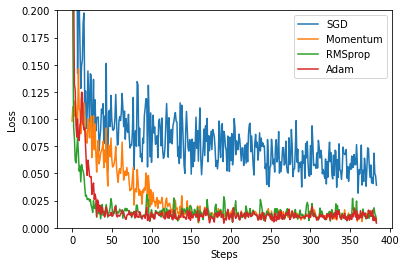

In [18]:
for i, l_his in enumerate(loss_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()